### Es 1
Hai a disposizione un file `data.csv` contenente dati mensili di passeggeri con due colonne:

- `date`: data in formato `YYYY-MM` (mese/anno)
- `passengers`: numero di passeggeri per quel mese


Costruisci un modello di **regressione polinomiale** che approssima l’andamento del numero di passeggeri nel tempo.

1. Carica il dataset.
2. Convertilo in un formato numerico utilizzando una colonna `mese_numerico` che conti i mesi a partire da gennaio 1949.
3. Applica una regressione polinomiale (grado a tua scelta).
4. Calcola l’RMSE tra i valori reali e quelli predetti.
5. Visualizza i dati reali e la curva stimata con Plotly.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import plotly.express as px

df = pd.read_csv("data.csv")
df = df.dropna()
df.head(20)

,date,passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
5,1949-06,135.0
6,1949-07,148.0
7,1949-08,148.0
8,1949-09,136.0
9,1949-10,119.0


In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go

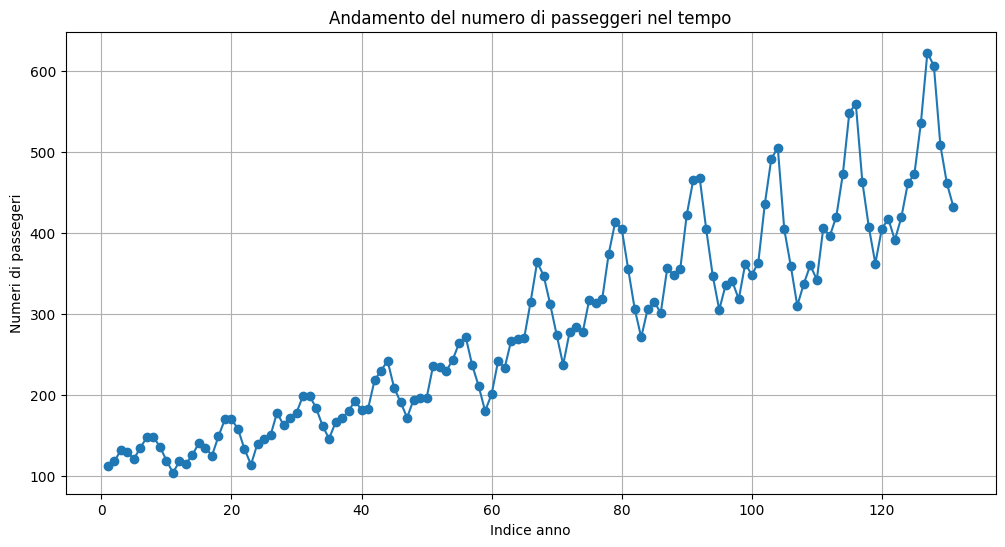

In [33]:
df["mese_numeric"] = range(1,len(df)+1)
x = df["mese_numeric"].values.reshape(-1,1)
y = df["passengers"].values

plt.figure(figsize=(12, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.title('Andamento del numero di passeggeri nel tempo')
plt.xlabel('Indice anno')
plt.ylabel('Numeri di passegeri')
plt.grid(True)
plt.show()

RMSE: 45.00


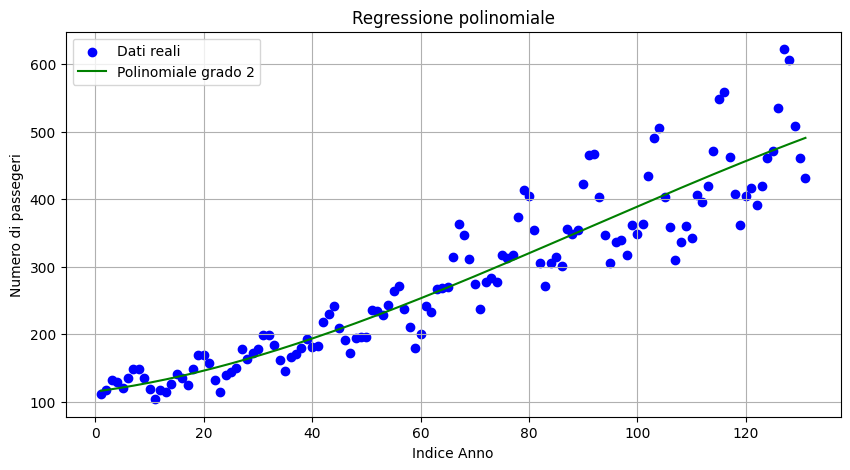

In [34]:
poly = PolynomialFeatures(degree=3)  # ← tu peux changer le degré ici
X_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Calcolo del RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse:.2f}")

plt.figure(figsize=(10, 5))
plt.scatter(x, y, label="Dati reali", color="blue")
plt.plot(x, y_pred, label=f"Polinomiale grado 2", color="green")
plt.xlabel("Indice Anno")
plt.ylabel("Numero di passegeri")
plt.title("Regressione polinomiale")
plt.legend()
plt.grid(True)
plt.show()

In [35]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df["date"], y=y, mode="markers", name="valori reali"))
fig.add_trace(go.Scatter(x=df["date"], y=y_pred, mode='lines', name='Curva di predizione Predizione'))
fig.update_layout(title="Regressione polinomiale", xaxis_title="Data", yaxis_title="Numero di passengeri")
fig.show()

### Es2. 
Costruisci una web app con Dash che permette all’utente di scegliere il grado del polinomio per adattare un modello di regressione ai dati non lineari e vedere il risultato aggiornarsi dinamicamente.


1. Genera 100 punti x tra -3 e 3.

2. Calcola ad esempio y = x³ - x + rumore.

3. Costruisci un'interfaccia Dash con:
    - uno slider per scegliere il grado del polinomio (1–10),
    - un grafico Plotly che mostra i dati e la curva stimata.

4. Usa PolynomialFeatures + LinearRegression da scikit-learn per stimare la curva